<a href="https://colab.research.google.com/github/kmkarakaya/ML_tutorials/blob/master/Which_Activation_%26_Loss_functions_Part_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Which Activation & Loss functions should be used in Classification Problems?

Today, we will focus on how to select Activation & Loss functions in Classification Problems.

First, we will classify the Classification Problems.

Then, for each classification problem, we will apply several Activation & Loss functions and observe their effects on performance.

Furthermore, we will also discuss how the target encoding can affect the selection of Activation & Loss functions.

In the end, we will have a taxonomy indicating the correct way of using Activation & Loss functions according to the Classification Problems at hand.


If you would like to learn more about Deep Learning with practical coding examples, please **subscribe** to [my YouTube Channel](https://www.youtube.com/channel/UCrCxCxTFL2ytaDrDYrN4_eA/playlists) or **follow** [my blog on Medium](https://medium.com/@kmkarakaya). Do not forget to turn on **Notifications** so that you will be notified when ***new parts are uploaded***.

You can access this **Colab Notebook** using [the link](https://colab.research.google.com/drive/1A-B_lSo1hVENzr1RUWnhTtjXGGM_L8Sl?usp=sharing) given in the video description below.

Furthermore, you can wacth this notebook on [Youtube](https://www.youtube.com/channel/UCrCxCxTFL2ytaDrDYrN4_eA/playlists) as well!

If you are ready, let's get started!


---
# References

[ Keras API reference / Losses / Probabilistic losses](https://keras.io/api/losses/probabilistic_losses/
) 

[Keras Activation Functions](https://keras.io/api/layers/activations/)

[Tensorflow Data pipeline (tf.data) guide](https://www.tensorflow.org/guide/data#using_tfdata_with_tfkeras)

[How does tensorflow sparsecategoricalcrossentropy work?](https://stackoverflow.com/questions/59787897/how-does-tensorflow-sparsecategoricalcrossentropy-work)


[Cross-entropy vs sparse-cross-entropy: when to use one over the other](https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other)

[Why binary_crossentropy and categorical_crossentropy give different performances for the same problem?](https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances)

---
# Types of Classification Tasks

In general, there are three main types/categories for Classification Tasks in machine learning:

**A. binary classification** two target classes

**B. multi-class classification** more than two exclusive targets, only one class can be assigned to an input

**C. multi-label classification** more than two non exclusive targets,  one input can be labeled with multiple target classes.

We will see the details of each classification task along with an example dataset and Keras model below.





---
# Types of Label Encoding
In general, we can use 
* **a floating number** (e.g. in binary classification: 1 or 0)
* **one-hot encoding** (e.g. in multi-class classification: [0 0 1 0 0])
* **a vector (array) of integers** (e.g. in multi-label classification: [14 225 3])

We will cover the all possible encodings in the following examples.

----
# Types of Activation Functions for Classification Tasks

In Keras, there are several [ Activation Functions](https://keras.io/api/layers/activations/). Below I summarize two of them:

* **Sigmoid or Logistic Activation Function:** Sigmoid function maps any input to an output ranging from **0 to 1**. For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1. Sigmoid is equivalent to a 2-element Softmax, where **the second element is assumed to be zero.**. **Therefore, sigmoid is mostly used for binary classification.**

* **Softmax function :** Softmax converts a real vector to **a vector of categorical probabilities**. The elements of the output vector are in range (0, 1) and **sum to 1**. Each vector is handled independently. **Softmax is often used** as the activation for the last layer of a **classification** network because the result could be interpreted as a probability distribution. **Therefore, Softmax is mostly used for multi-class or multi-label classification.**


These two activation functions are the most used ones for classification tasks ***at the last layer***.

**PLEASE NOTE THAT**  If we **don't specify any activation** function at the last layer, no activation is applied to the outputs of the layer  (ie. **"linear" activation: a(x) = x).**

---
#Types of Loss Functions for Classification Tasks

In Keras, there are several [Loss Functions](https://keras.io/api/losses/probabilistic_losses/). Below, I summarized the ones used in **Classification** tasks:

* **BinaryCrossentropy:** Computes the cross-entropy loss between true labels and predicted labels. We use this cross-entropy loss **when there are only two label classes (assumed to be 0 and 1)**. For each example, there should be a **single floating-point value per prediction**.

* **CategoricalCrossentropy:** Computes the crossentropy loss between the labels and predictions. We use this crossentropy loss function **when there are two or more label classes.** We expect **labels to be provided in a one_hot representation**. If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss. There should be # classes floating point values per feature.

* **SparseCategoricalCrossentropy:** Computes the crossentropy loss between the labels and predictions. We use this crossentropy loss function **when there are two or more label classes**. We expect **labels to be provided as integers**. If you want to provide labels using one-hot representation, please use CategoricalCrossentropy loss. There should be # classes floating point values per feature for y_pred and a single floating point value per feature for y_true.

**IMPORTANT:** 
1. In Keras, **these three Cross-Entropy** functions expects two inputs: ***correct (actual) labels*** and ***predicted labels***:
  * As mentioned above,**correct (actual) labels** can be encoded either ***one-hot*** or ***array of integer*** values. 
  * However, the  **predicted labels** should be presented as a ***probability distribution***. 
  * If the  predicted labels are **not converted to a probability** distribution ***by the last layer*** of the model (using *sigmoid* or *softmax* activation functions), we **need to inform** these three Cross-Entropy functions by setting thier **from_logits = True**. Thus, these three Cross-Entropy functions will perform accordingly.
2. Both, **categorical cross entropy** and **sparse categorical cross entropy** have **the same loss function** which we have mentioned above. The **only difference** is the **true labels** format:
  * If ***correct (actual) labels*** are **one-hot** encoded, use **categorical_crossentropy**. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

  * But if ***correct (actual) labels*** are **integers**, use **sparse_categorical_crossentropy**. Examples for above 3-class classification problem: [1] , [2], [3]

  * The usage entirely depends on how **we load our dataset**. 
  * **One advantage of using sparse categorical cross entropy** is it saves storage in memory as well as time in computation because it simply uses a single integer for a class, rather than **a whole one-hot vector**.

I will explain the above concepts by designing models in **three** parts

# Part A: Binary classification (two target classes) 

For a binary classification task, I will use "**cats vs dogs**" dataset which is available in **TF Datasets**.

## A. 1. True (Actual) Labels are encoded with a single floating number (1/0) 

In [78]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt


In [79]:
cats_vs_dogs = tfds.load('cats_vs_dogs', split='train', as_supervised=True)

In [80]:
print("Number of samples: ", cats_vs_dogs.cardinality().numpy())

Number of samples:  23262


9 samples from the dataset


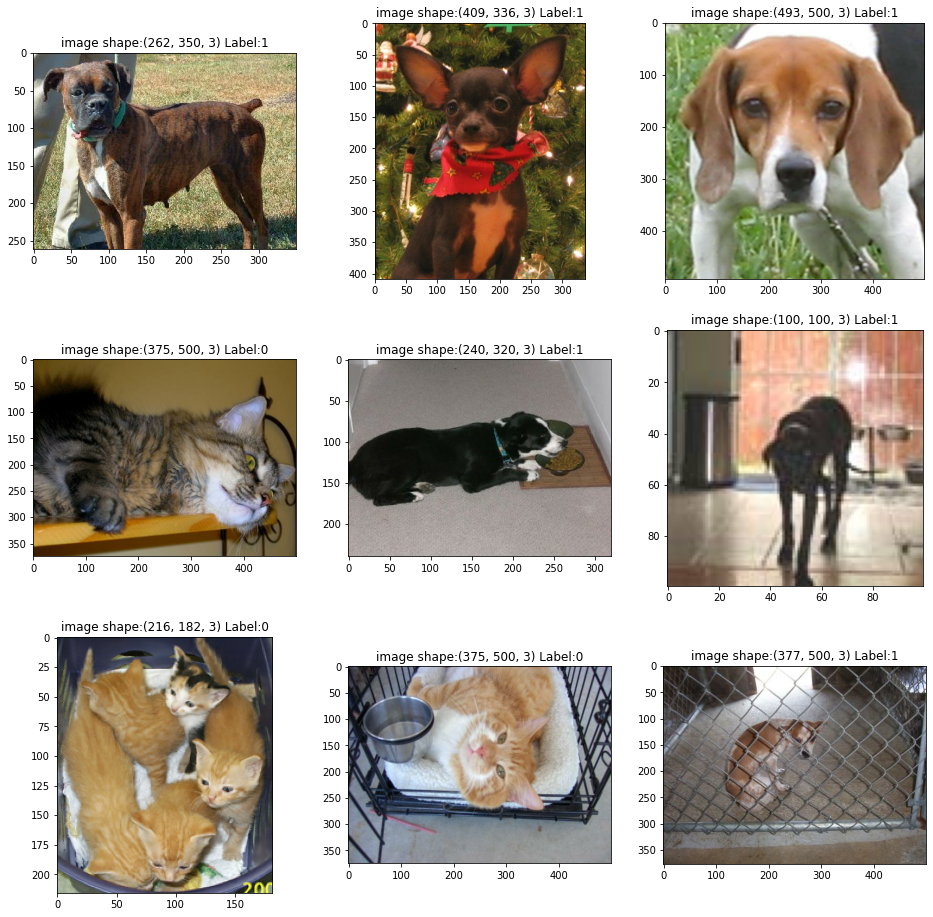

In [81]:
def show_samples(dataset):
  w=30
  h=30
  fig=plt.figure(figsize=(16, 16))
  columns = 3
  rows = 3
  
  print(columns*rows,"samples from the dataset")
  i=1
  for a,b in dataset.take(columns*rows): 
    fig.add_subplot(rows, columns, i)
    plt.imshow(a)
    #plt.imshow(a.numpy())
    plt.title("image shape:"+ str(a.shape)+" Label:"+str(b.numpy()) )

    i=i+1
  pyplot.show()
show_samples(cats_vs_dogs)

**Notice that:**
* There are **only two label classes**: ***cats and dogs***. 
* For each sample, there is a **single floating-point value per label:** (***0 --> cat, 1--> dog***)


### Let's resize and scale the images so that we can save time in training

In [82]:
#VGG16 expects min 32 x 32 
def resize_scale_image(image, label):
  image = tf.image.resize(image, [32, 32])
  image = image/255.0
  return image, label

9 samples from the dataset


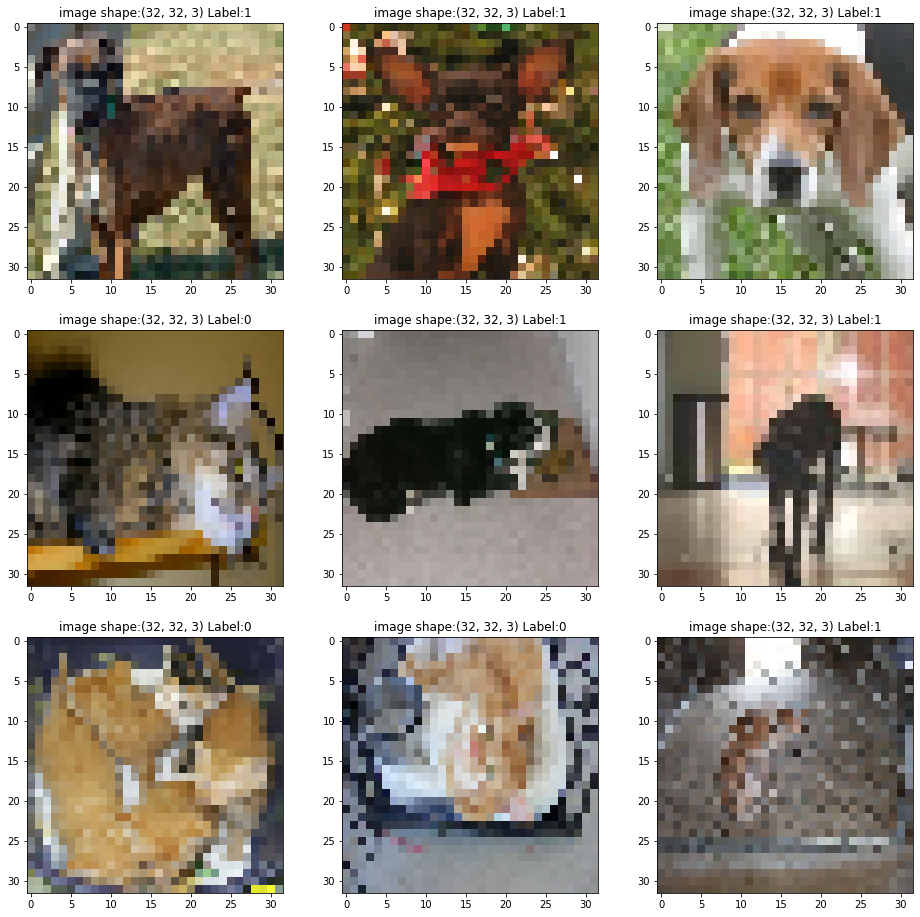

In [83]:
cats_vs_dogs_resize_scale=cats_vs_dogs.map(resize_scale_image)
show_samples(cats_vs_dogs_resize_scale)

### Prepare the data pipeline by setting batch size & buffer size

In [84]:
batch_size = 64 
buffer_size = cats_vs_dogs_resize_scale.cardinality().numpy()/10

print("Number of samples: ", cats_vs_dogs_resize_scale.cardinality().numpy())
#cats_vs_dogs_batched=cats_vs_dogs.repeat(3).shuffle(buffer_size=buffer_size).batch(64, )
cats_vs_dogs_batched=cats_vs_dogs_resize_scale.batch(64, drop_remainder=True )

print("Number of batches: ", cats_vs_dogs_batched.cardinality().numpy())


Number of samples:  23262
Number of batches:  363


### To train fast, let's use Transfer Learning by importing VGG16

In [85]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(32, 32, 3), # VGG16 expects min 32 x 32
    include_top=False)  # Do not include the ImageNet classifier at the top.
base_model.trainable = False

### Create the classification model
Pay attention that:
* The last layer has only 1 unit. So the output will be **a single floating point** as the true (actual) label.

* For the last layer, the activation function can be:
  * None 
  * sigmoid 
  * softmax
* When there is **no activation** function is used, we need to set `from_logits=True` **in cross-entropy functions** as we discussed above

### Try & See
You can try and see the performance of the model by using **combination of activation  and loss functions.**

In [91]:
inputs = keras.Input(shape=(32, 32, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)

# A Dense classifier with a single unit (binary classification)
# activation default is NONE!
# we can supply activation=tf.keras.activations.sigmoid or
# activation=tf.keras.activations.softmax
outputs = keras.layers.Dense(1,  activation=tf.keras.activations.sigmoid )(x) 
model = keras.Model(inputs, outputs)

In [92]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(), # default from_logits=False
              metrics=[keras.metrics.BinaryAccuracy()])

In [93]:
model.fit(cats_vs_dogs_batched, epochs=3)

Epoch 1/3
363/363 [==============================] - 260s 717ms/step - loss: 0.6241 - binary_accuracy: 0.6543
Epoch 2/3
363/363 [==============================] - 259s 715ms/step - loss: 0.5718 - binary_accuracy: 0.7007
Epoch 3/3
363/363 [==============================] - 260s 716ms/step - loss: 0.5559 - binary_accuracy: 0.7129


In [96]:
model.evaluate(cats_vs_dogs_batched)

363/363 [==============================] - 259s 712ms/step - loss: 0.5500 - binary_accuracy: 0.7166


[0.5500054359436035, 0.716640830039978]

---
## Obtained Results*:

| Activation | Loss | Accuracy |
| :- | -: | :-: |
| softmax | BinaryCrossentropy() | 0.4988
| **sigmoid** | **BinaryCrossentropy()** | **0.7181**
| None | BinaryCrossentropy(from_logits=True) | 0.6416
---
| None | CategoricalCrossentropy(from_logits=True) | 0.5035
| sigmoid | CategoricalCrossentropy() |0.4975
| softmax | CategoricalCrossentropy() |0.4978
----
| any | SparseCategoricalCrossentropy() | InvalidArgumentError

.

.
* When you run this notebook, most probably you would not get the exact numbers rather you would observe very similar values due to stocastic nature of ANNs.  

As discussed above, we observe that:
* Generally, we use **softmax activation** instead of **sigmoid** with the **cross-entropy loss** because softmax activation distributes the probability throughout each output node.
* But, for **binary classification**, we use **sigmoid** rather than softmax. 
* The practical reason is that **softmax** is especially designed for **multi-class** and **multi-label** classification tasks.
* The above results support this recommendation
We can **conclude** that, if the task is **binary classification** and true(actual) labels are encoded as a **single floating number** (0/1) we need to use:
* activation = **sigmoid**
* loss =**BinaryCrossentropy**
             

## A. 2. True (Actual) Labels are one-hot encoded [1 0] or [0 1] 

### First convert the true (actual) label encoding to one-hot

In [100]:
def one_hot(image, label):
  label = tf.one_hot(label, depth=2)
  return image, label

9 samples from the dataset


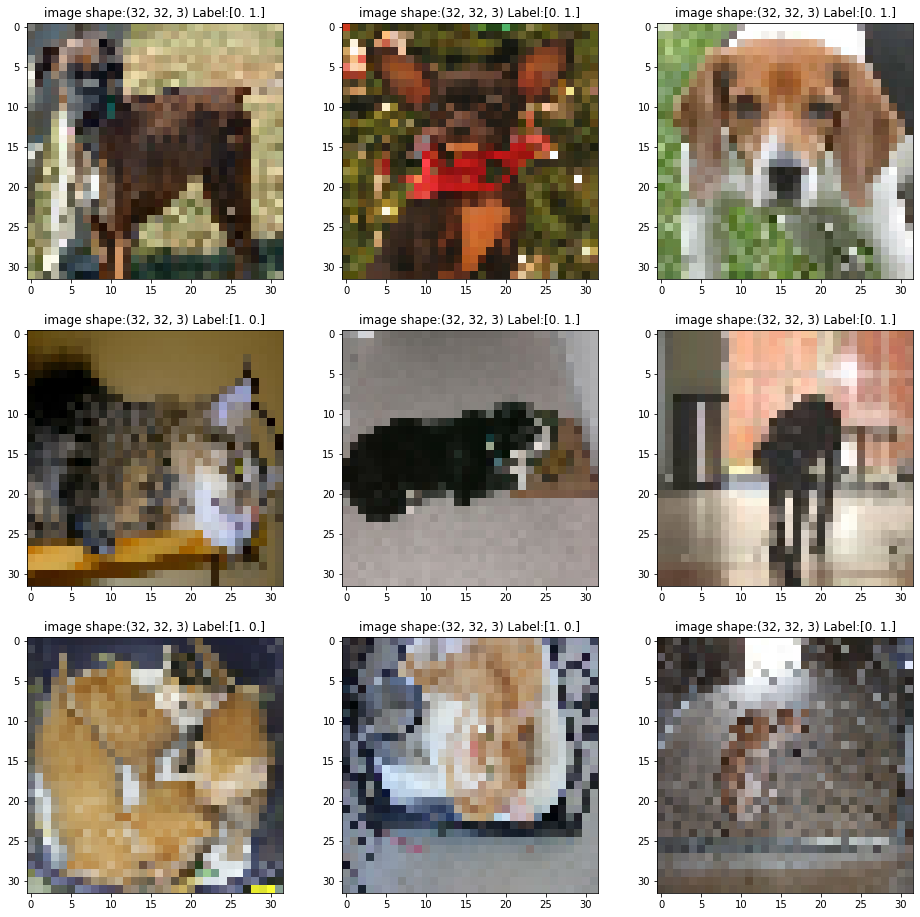

In [106]:
cats_vs_dogs_one_hot= cats_vs_dogs_resize_scale.map(one_hot)
show_samples(cats_vs_dogs_one_hot)

**Notice that:**
* There are **only two label classes**: ***cats and dogs***. 
* Labels are now **one-hot encoded** 

 **[1. 0.] --> cat,            
   [0. 1.]--> dog**

## Prepare the data pipeline by setting batch size

In [107]:
cats_vs_dogs_one_hot_batched=cats_vs_dogs_one_hot.batch(64, drop_remainder=True )

### Create the classification model
Pay attention that:
* The last layer has** now 2 units** instead of 1. Thus the output will support  **one-hot** encoding of the true (actual) label. Remeber that one-hot vector has two floating point numbers: [1. 0.] or [0. 1.]

* For the last layer, the activation function can be:
  * None 
  * sigmoid 
  * softmax
* When there is **no activation** function is used, we need to set `from_logits=True` **in cross-entropy functions** as we discussed above

### Try & See
You can try and see the performance of the model by using **combination of activation  and loss functions.**

In [108]:
inputs = keras.Input(shape=(32, 32, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)

# we can supply activation=tf.keras.activations.sigmoid or
# activation=tf.keras.activations.softmax
outputs = keras.layers.Dense(2, activation=tf.keras.activations.sigmoid)(x) 
model = keras.Model(inputs, outputs)

In [109]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(), # default from_logits=False
              metrics=[keras.metrics.BinaryAccuracy()])

In [110]:
model.fit(cats_vs_dogs_one_hot_batched, epochs=3)

Epoch 1/3
363/363 [==============================] - 260s 717ms/step - loss: 0.6058 - binary_accuracy: 0.5184
Epoch 2/3
363/363 [==============================] - 261s 718ms/step - loss: 0.5553 - binary_accuracy: 0.5011
Epoch 3/3
363/363 [==============================] - 262s 721ms/step - loss: 0.5418 - binary_accuracy: 0.5006


In [111]:
model.evaluate(cats_vs_dogs_one_hot_batched)

363/363 [==============================] - 262s 721ms/step - loss: 0.5389 - binary_accuracy: 0.5005


[0.5388750433921814, 0.5004734992980957]

---
## Obtained Results*:


| Activation | Loss | Accuracy |
| :- | -: | :-: |
| **softmax** | **BinaryCrossentropy()** | **0.7240**
| sigmoid | BinaryCrossentropy() | 0.7190
| None | BinaryCrossentropy(from_logits=True) | 0.6912
---
| sigmoid | CategoricalCrossentropy() | 0.5004
----
| any | SparseCategoricalCrossentropy() | InvalidArgumentError

.
* When you run this notebook, most probably you would not get the exact numbers rather you would observe very similar values due to stocastic nature of ANNs.


As discussed above, we observe that:
*  **softmax activation** instead of **sigmoid** with the **binary cross-entropy loss function** leads better result when true (actual) labels are encoded as **one-hot** vector:


# Binary Classification Summary

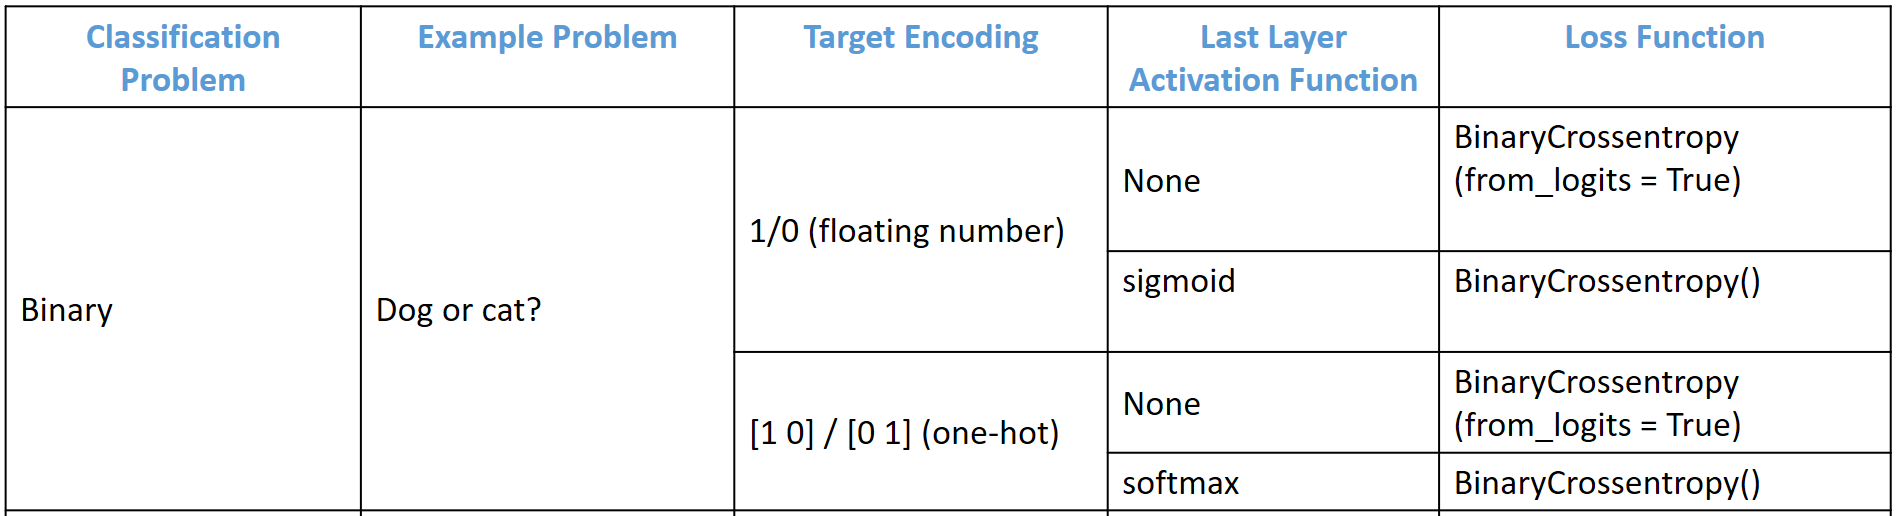

# Part B: Multi-Label classification (more than two target classes) 